In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 150

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Here is the cash flow data for the company. Values in millions
cashFlow_years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
freeCashFlow = [12.02, 13.45, 10.2, 15.44, 14.9, 16.37, 17.18]
freeCashFlowData = np.array([cashFlow_years, freeCashFlow])

#array for growth as a percentage for years 2013->2018, to be populated with a for loop.
growth = np.zeros(6)

In [4]:
for i in range(1, len(growth)+1):#index counter is done for you
    growth[i-1] = (freeCashFlowData[1,i]/freeCashFlowData[1,i-1]-1) * 100
    
print(growth)

[ 11.8968386  -24.16356877  51.37254902  -3.49740933   9.86577181
   4.94807575]


In [5]:
avgGrowthRate = growth.mean()
print('The average growth rate was:', avgGrowthRate, '%')

The average growth rate was: 8.403709513779809 %


In [6]:
# Define a function that returns an array containing cash flow and discounted cash flow for each future year.
def calcDCF(discRate, growthRate, currentFcf, numYears, startYear):
    
    # Start zero arrays and fill the array with a loop.
    futureCashFlows = np.zeros(numYears)
    futureDiscCashFlows = np.zeros(numYears)
    
    # Now fill the array with a loop
    for i in range(0, numYears):
        futureCashFlows[i] = currentFcf * (growthRate+1) ** i
        futureDiscCashFlows[i] = futureCashFlows[i]/((1+discRate)**i)
    
    # Have an array for the future years, from say, 2020 to 2020 + numYears
    futureYears = np.array(range(startYear, startYear+numYears))
    
    # Return the arrays of: future cash flows
    # Future discounted Cash Flows
    # Future years that those cash flowws occur in
    return [futureCashFlows, futureDiscCashFlows, futureYears]

In [7]:
# Now use the calcDCF() function
# compute the projected future cash flows of the company and the discounted values of those cash flows.
# Use a discount rate of 20% to compensate us for vicissitudes of life.
# Have it start at year 2020, have it go for 9 years
[futureCashFlows, futureDiscCashFlows, futureYears] = calcDCF(0.2, 0.08, 17, 9, 2020)

print('The future cash flow years calculated are:\n', futureYears)
print('The future cash flows are:\n', futureCashFlows)
print('The discounted future cash flows are:\n', futureDiscCashFlows)

The future cash flow years calculated are:
 [2020 2021 2022 2023 2024 2025 2026 2027 2028]
The future cash flows are:
 [17.         18.36       19.8288     21.415104   23.12831232 24.97857731
 26.97686349 29.13501257 31.46581357]
The discounted future cash flows are:
 [17.         15.3        13.77       12.393      11.1537     10.03833
  9.034497    8.1310473   7.31794257]


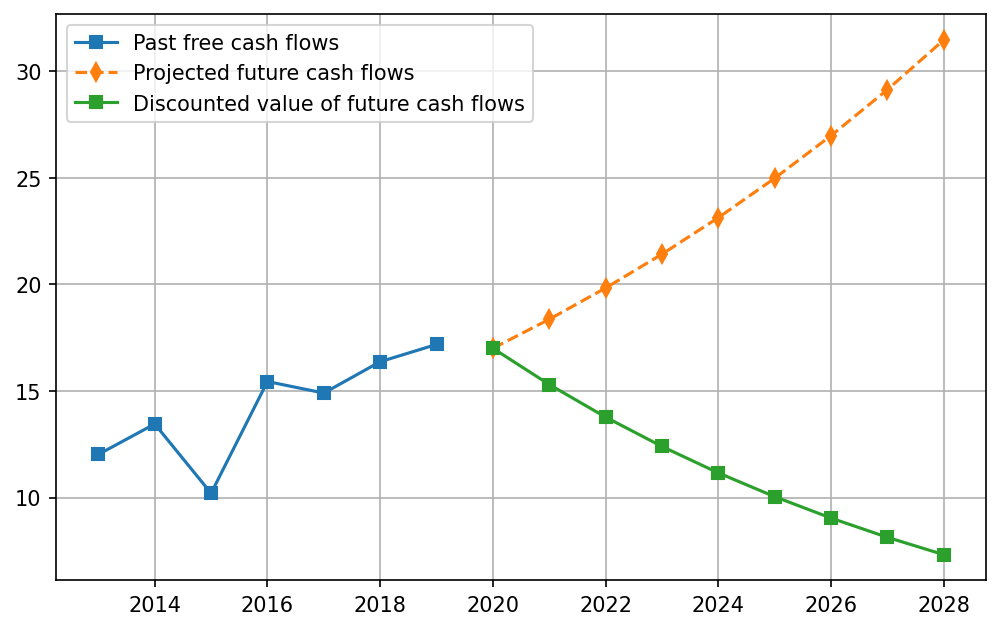

In [8]:
# plot the past cash flows, future cash flows, and discounted future cash flows on a graph.
plt.plot(freeCashFlowData[0,:], freeCashFlowData[1,:], '-s', label='Past free cash flows')
plt.plot(futureYears, futureCashFlows, '--d', label='Projected future cash flows')
plt.plot(futureYears, futureDiscCashFlows, '-s', label='Discounted value of future cash flows')
plt.legend()
plt.grid()